# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_02


## Create sqlite data base

In [2]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

apartment_database.db


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('apartments_data_prepared.csv', 
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(120, 5)


,web-scraper-order,address_raw,rooms,area,price
0,1693993818-1,"Am Eulachpark 25, 8404 Winterthur, ZH",6.5,143.0,3017.0
1,1693993818-2,"Katharina Sulzer Platz 2, 8400 Winterthur, ZH",1.0,132.0,3260.0
2,1693993818-3,"8400 Winterthur, ZH",4.5,117.0,3782.0
3,1693993818-4,"Untere Briggerstrasse 66, 8406 Winterthur, ZH",3.5,88.0,2244.0
4,1693993818-5,"Wülflingerstrasse 25, 8400 Winterthur, ZH",3.5,80.0,1980.0


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

120

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df_rooms_bigger_1 = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df_rooms_bigger_1

,OrderId,Address,Rooms,Area,Price
0,1693993818-1,"Am Eulachpark 25, 8404 Winterthur, ZH",6.5,143.0,3017.0
1,1693993818-2,"Katharina Sulzer Platz 2, 8400 Winterthur, ZH",1.0,132.0,3260.0
2,1693993818-3,"8400 Winterthur, ZH",4.5,117.0,3782.0
3,1693993818-4,"Untere Briggerstrasse 66, 8406 Winterthur, ZH",3.5,88.0,2244.0
4,1693993818-5,"Wülflingerstrasse 25, 8400 Winterthur, ZH",3.5,80.0,1980.0
...,...,...,...,...,...
114,1693993832-116,"Schiltwiesenweg 24, 8404 Winterthur, ZH",3.0,65.0,1030.0
115,1693993832-117,"Zürcherstrasse 58, 8406 Winterthur, ZH",3.5,100.0,2180.0
116,1693993832-118,"Maienstrasse 8, 8406 Winterthur, ZH",4.5,89.0,1985.0
117,1693993832-119,"Neuwiesenstr. 14, 8400 Winterthur, ZH",1.0,32.0,1005.0


## additional queries

## Plot histogramm of rental prices

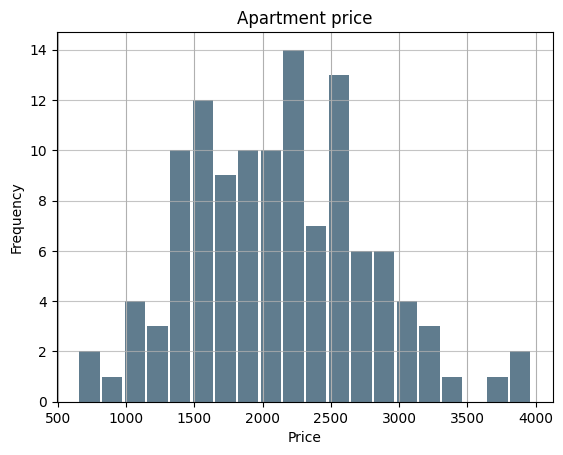

In [7]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Close db connection (if open)

In [8]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1014-azure
Datetime: 2024-09-25 13:40:57
Python Version: 3.11.10
-----------------------------------
